# **Proyecto: Factores que influyen en las tasas de suicidio a nivel mundial**

El suicidio es un problema de salud pública que afecta a millones de personas en todo el mundo y está influenciado por factores sociales, económicos y demográficos. El dataset Global Suicide Rates proporciona información sobre tasas de suicidio en diferentes países, segmentada por año, género, edad y PIB per cápita, lo que permite explorar patrones y tendencias a lo largo del tiempo. El objetivo de este análisis es examinar la evolución de las tasas de suicidio a nivel global e identificar los factores más determinantes en su incidencia. A través de un análisis exploratorio y técnicas estadísticas, se buscará establecer relaciones concretas entre el suicidio y variables como la economía, la demografía y otros indicadores clave, con el fin de obtener conclusiones fundamentadas sobre sus principales causas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# **1. Exploración de la data**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/IsabelSuarezRoldan/Fundamentos-programacion-udea/refs/heads/main/30_merged_dataset_v00_final.csv')

In [4]:
df.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


In [5]:
df.tail()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
1416,Venezuela (Bolivarian Republic of),2009,751.0,73.6,166.0,9,7.59,10,0.1,25.448414,25646139.0,0.754,14.0
1417,Venezuela (Bolivarian Republic of),2010,775.0,73.7,158.0,9,7.22,10,0.1,25.448414,26078766.0,0.754,14.0
1418,Venezuela (Bolivarian Republic of),2011,760.0,73.8,158.0,9,6.74,10,0.1,25.448414,26503892.0,0.756,14.1
1419,Venezuela (Bolivarian Republic of),2012,731.0,73.7,161.0,9,6.70,10,0.1,25.448414,26926228.0,0.767,14.1
1420,Venezuela (Bolivarian Republic of),2013,618.0,73.8,159.0,9,6.71,10,0.1,25.448414,27345912.0,0.770,14.2


**1.1 Dimensiones del dataset**

In [6]:
df.shape
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 1421 filas y 13 columnas.


**1.2 Resumen estructural del DataFrame**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1421 non-null   object 
 1   Year                             1421 non-null   int64  
 2   Suicides number                  1421 non-null   float64
 3   Life expectancy                  1421 non-null   float64
 4   Adult Mortality                  1421 non-null   float64
 5   Infant deaths                    1421 non-null   int64  
 6   Alcohol                          1421 non-null   float64
 7   Under-five deaths                1421 non-null   int64  
 8   HIV/AIDS                         1421 non-null   float64
 9   GDP                              1421 non-null   float64
 10  Population                       1421 non-null   float64
 11  Income composition of resources  1421 non-null   float64
 12  Schooling           

**1.3 Análisis de valores nulos**

In [8]:
df.isna().sum()

Country                            0
Year                               0
Suicides number                    0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Under-five deaths                  0
HIV/AIDS                           0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

**1.4 Análisis de filas duplicadas**

In [9]:
df.duplicated().sum()

0

**1.5 Resumen estadístico de las columnas**7

In [10]:
df.describe()

,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,2007.251935,2629.177340,75.233638,116.912738,5.805067,6.664729,7.038705,0.397537,14018.867107,1.294056e+07,0.748189,13.929838
std,4.503817,6755.607644,5.399686,74.413799,13.088297,3.917763,16.104082,2.227681,19697.409425,3.652156e+07,0.160380,2.462661
min,2000.000000,0.000000,53.700000,1.000000,0.000000,0.010000,0.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,2003.000000,85.000000,72.500000,68.000000,0.000000,3.540000,0.000000,0.100000,1564.966945,2.541220e+05,0.695000,12.500000
50%,2007.000000,501.000000,74.900000,117.000000,1.000000,6.950000,1.000000,0.100000,4622.415160,1.735275e+06,0.773000,13.800000
75%,2011.000000,1867.000000,78.900000,163.000000,4.000000,9.800000,5.000000,0.100000,16462.485560,7.463157e+06,0.852000,15.600000
max,2015.000000,56958.000000,89.000000,498.000000,111.000000,17.870000,127.000000,29.700000,119172.741800,3.000785e+08,0.948000,20.700000


# **2. Limpieza de datos**

In [11]:
df.columns

Index(['Country', 'Year', 'Suicides number', 'Life expectancy',
       'Adult Mortality', 'Infant deaths', 'Alcohol', 'Under-five deaths',
       'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources',
       'Schooling'],
      dtype='object')

In [12]:
df.rename(columns={
       'GDP':'Gross Domestic Product'
},inplace = True)

df.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling
0,Albania,2000,54.0,72.6,11.0,1,3.66,1,0.1,1175.788981,38927.0,0.656,10.7
1,Albania,2001,119.0,73.6,14.0,1,4.25,1,0.1,1326.973390,36173.0,0.662,10.6
2,Albania,2002,133.0,73.3,15.0,1,3.73,1,0.1,1453.642777,3511.0,0.670,10.7
3,Albania,2003,124.0,72.8,18.0,1,4.29,1,0.1,189.681557,339616.0,0.674,10.7
4,Albania,2004,146.0,73.0,17.0,1,4.54,1,0.1,2416.588235,326939.0,0.681,10.9


# **3. Análisis estadístico**

**3.1 Tasa de suicidio por cada 100.000 habitantes**

In [13]:
df['Suicide_rate'] = (df['Suicides number'] / df['Population']) * 100000
df[['Suicides number', 'Population', 'Suicide_rate']].head()

,Suicides number,Population,Suicide_rate
0,54.0,38927.0,138.721196
1,119.0,36173.0,328.974650
2,133.0,3511.0,3788.094560
3,124.0,339616.0,36.511825
4,146.0,326939.0,44.656648


**Distribución de la tasa de suicidio por año**

Ajusta el número de suicidios en función de la población total, permitiendo comparaciones más justas. Permite comparar países o períodos con diferentes tamaños de población.

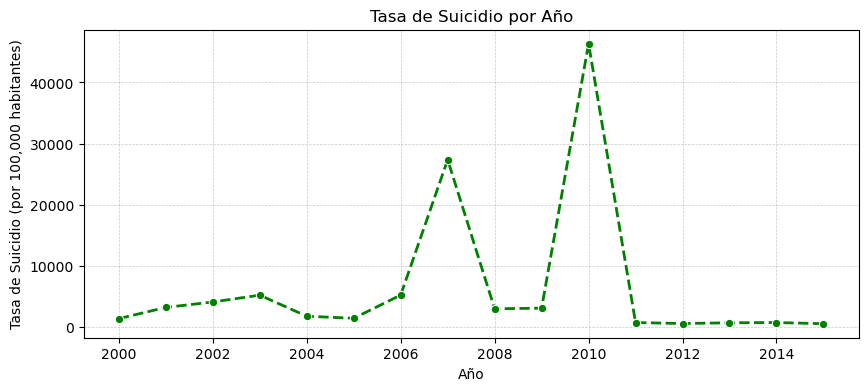

In [14]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="Year", y="Suicide_rate", linestyle="dashed", marker="o", color="green", linewidth=2, errorbar=None)
plt.title("Tasa de Suicidio por Año")
plt.xlabel("Año")
plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

**3.2 Tendencia de suicidios a lo largo del tiempo**

Permite mostrar el número total de suicidios por año, indicando si los suicidios aumentan o disminuyen con el tiempo.

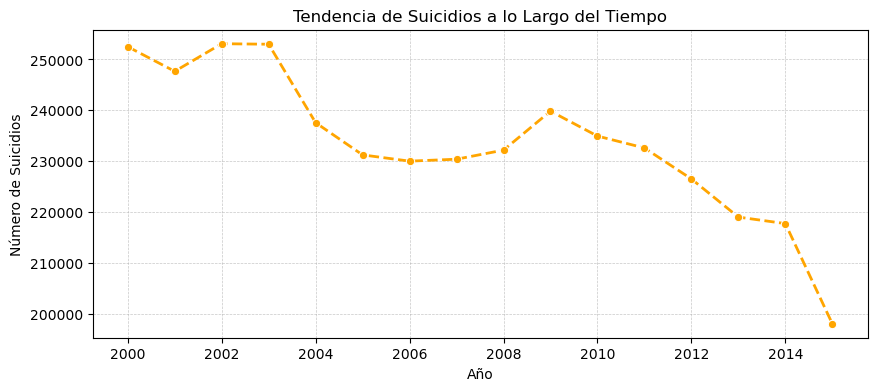

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Year', y='Suicides number', data=df, estimator='sum', linestyle="dashed", marker="o", color="orange", linewidth=2, errorbar=None)
plt.title('Tendencia de Suicidios a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Suicidios')
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

**3.3 Comparación por país**

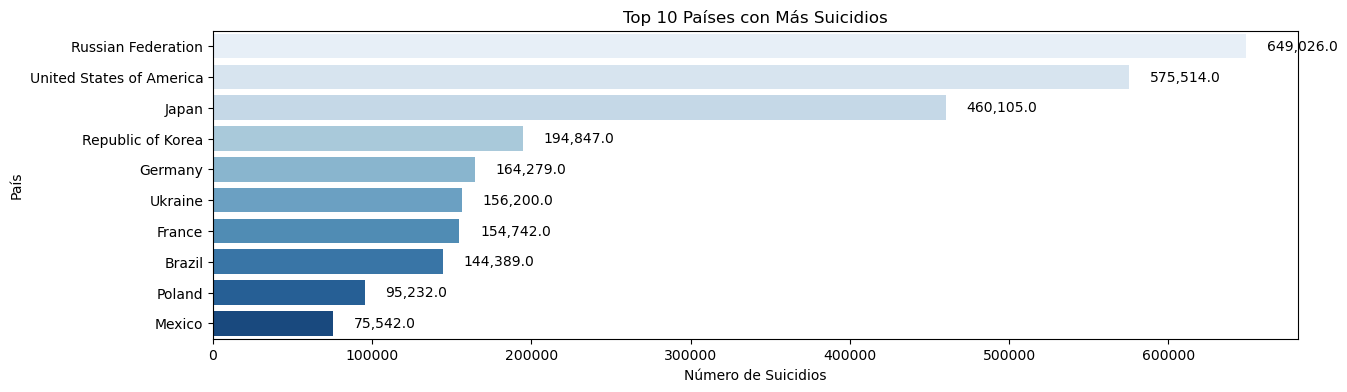

In [16]:
top_countries = df.groupby('Country')['Suicides number'].sum().nlargest(10)

plt.figure(figsize=(14,4))
colors = sns.color_palette("Blues_r", len(top_countries))

ax = sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.values, palette= colors, legend=False)

plt.title('Top 10 Países con Más Suicidios')
plt.xlabel('Número de Suicidios')
plt.ylabel('País')

for i, v in enumerate(top_countries.values):
    ax.text(v + (0.02 * max(top_countries.values)), i, f"{v:,}", color='black', va='center')

plt.show()

# **4. Agrupación por paises de latinoamérica**

In [17]:
df['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Montenegro',
       'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       

In [18]:
paises_latam = [
    'Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
    'Uruguay', 'Venezuela (Bolivarian Republic of)'
]

df_latam = df[df['Country'].isin(paises_latam)].copy()

df_latam.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling,Suicide_rate
25,Argentina,2000,2774.0,74.1,137.0,12,7.68,14,0.1,7669.273916,3757452.0,0.764,15.0,73.826625
26,Argentina,2001,3132.0,74.0,138.0,12,7.76,13,0.1,717.694674,3747159.0,0.771,15.6,83.583323
27,Argentina,2002,3162.0,74.1,138.0,12,7.81,13,0.1,2579.193168,3788937.0,0.776,16.3,83.453486
28,Argentina,2003,3289.0,74.1,137.0,11,7.62,13,0.1,333.437600,3839379.0,0.770,16.4,85.664895
29,Argentina,2004,3121.0,74.7,13.0,11,7.63,12,0.1,4251.574348,38728696.0,0.775,16.3,8.058624


In [19]:
df_latam.rename(columns={
       'GDP':'Gross Domestic Product'
},inplace = True)

df_latam.head()

,Country,Year,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,Gross Domestic Product,Population,Income composition of resources,Schooling,Suicide_rate
25,Argentina,2000,2774.0,74.1,137.0,12,7.68,14,0.1,7669.273916,3757452.0,0.764,15.0,73.826625
26,Argentina,2001,3132.0,74.0,138.0,12,7.76,13,0.1,717.694674,3747159.0,0.771,15.6,83.583323
27,Argentina,2002,3162.0,74.1,138.0,12,7.81,13,0.1,2579.193168,3788937.0,0.776,16.3,83.453486
28,Argentina,2003,3289.0,74.1,137.0,11,7.62,13,0.1,333.437600,3839379.0,0.770,16.4,85.664895
29,Argentina,2004,3121.0,74.7,13.0,11,7.63,12,0.1,4251.574348,38728696.0,0.775,16.3,8.058624


**4.1 Tasa de suicidios por país de latinoamérica**

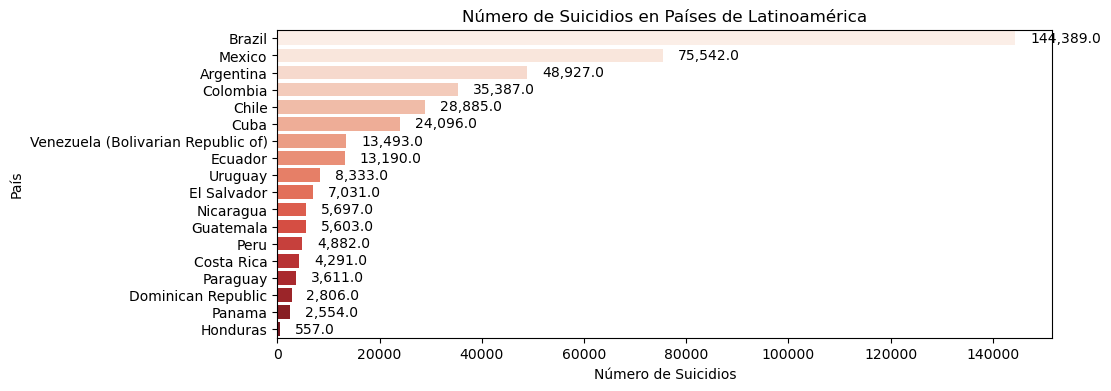

In [20]:
top_latam = df_latam.groupby('Country')['Suicides number'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
colors = sns.color_palette("Reds_r", len(top_latam))

ax = sns.barplot(x=top_latam.values, y=top_latam.index, hue=top_latam.values, palette=colors, legend=False)

plt.title('Número de Suicidios en Países de Latinoamérica')
plt.xlabel('Número de Suicidios')
plt.ylabel('País')

for i, v in enumerate(top_latam.values):
    ax.text(v + (0.02 * max(top_latam.values)), i, f"{v:,}", color='black', va='center')

plt.show()

**4.2 Tasas de suicidio en el tiempo de los países de Latinoamérica**

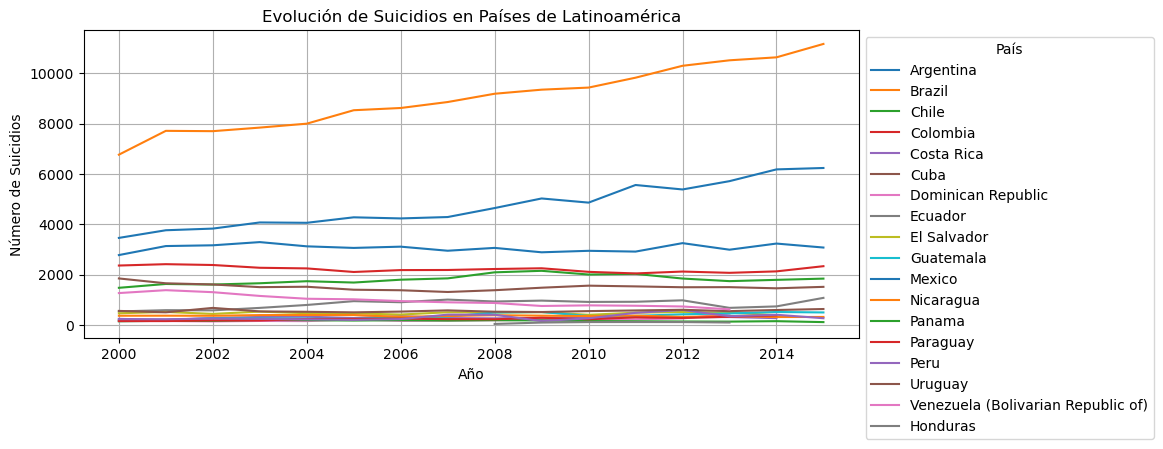

In [21]:
plt.figure(figsize=(10, 4))

# Agrupar suicidios por año y país
df_latam_grouped = df_latam.groupby(['Year', 'Country'])['Suicides number'].sum().reset_index()

palette = sns.color_palette("tab10", len(paises_latam))

sns.lineplot(x='Year', y='Suicides number', hue='Country', data=df_latam_grouped, palette= palette)

plt.title('Evolución de Suicidios en Países de Latinoamérica')
plt.xlabel('Año')
plt.ylabel('Número de Suicidios')
plt.legend(title='País', bbox_to_anchor=(1,1))
plt.grid(True)

plt.show()

El gráfico muestra la evolución del número de suicidios en países de Latinoamérica entre los años 2000 y 2015. Se observa que Brasil y Argentina tienen las cifras más altas, con una tendencia creciente a lo largo del tiempo. Otros países presentan variaciones menores o estabilidad en sus registros. La dispersión de las líneas indica diferencias significativas entre países en cuanto a la cantidad de suicidios reportados, aunque la mayoría se mantiene en rangos bajos en comparación con Brasil y Argentina.

**4.3 Relación entre suicidios y esperanza de vida en países de latinoamérica**

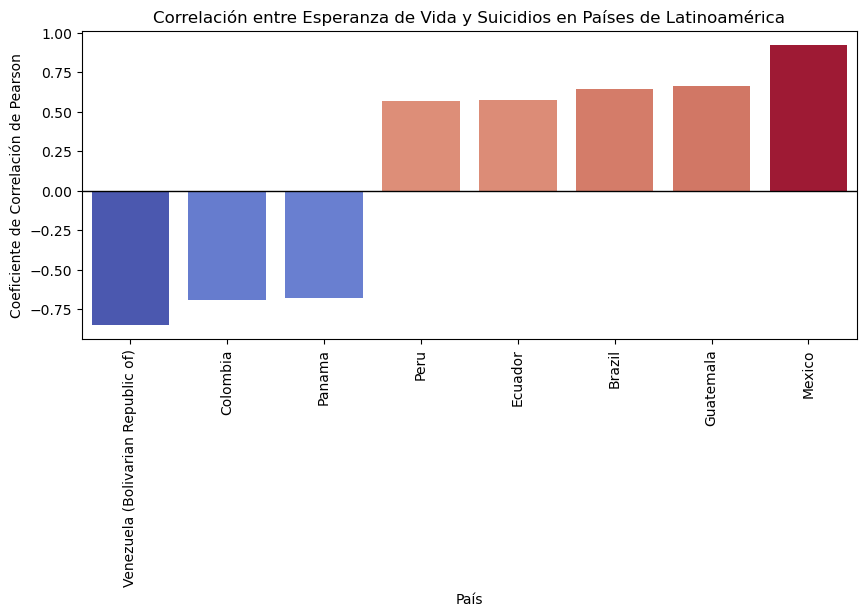

In [22]:
correlations = {}

# Calcular la correlación entre 'Life expectancy' y 'Suicides number' por país
for country in df_latam['Country'].unique():
    subset = df_latam[df_latam['Country'] == country]

    if len(subset) > 5:
        corr, p_value = pearsonr(subset['Life expectancy'], subset['Suicides number'])
        correlations[country] = (corr, p_value)

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Pearson Coefficient', 'P-value'])

# Filtrar solo países con correlación estadísticamente significativa (p < 0.05)
significant_correlation_df = correlation_df[correlation_df['P-value'] < 0.05].sort_values('Pearson Coefficient')

plt.figure(figsize=(10, 4))
sns.barplot(
    x=significant_correlation_df.index,
    y=significant_correlation_df['Pearson Coefficient'],
    hue=significant_correlation_df['Pearson Coefficient'],
    palette="coolwarm",
    legend=False
)
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=90)
plt.title("Correlación entre Esperanza de Vida y Suicidios en Países de Latinoamérica")
plt.ylabel("Coeficiente de Correlación de Pearson")
plt.xlabel("País")
plt.show()


Interpretación del coeficiente de correlación de Pearson:

- Los valores cercanos a +1 indican una correlación positiva fuerte: a mayor esperanza de vida, mayor cantidad de suicidios.

- Los valores cercanos a -1 indican una correlación negativa fuerte: a mayor esperanza de vida, menor cantidad de suicidios.

- Los valores cercanos a 0 indican que no hay relación significativa entre las variables.

**1. Países con correlación positiva (barras rojas):**

En países como México, Guatemala, Brasil, Ecuador y Perú, la relación es positiva. Esto significa que, en estos países, una mayor esperanza de vida se asocia con un mayor número de suicidios.
La posible explicación es que en estos países hay otros factores sociales, económicos o culturales que afectan la tasa de suicidios conforme aumenta la esperanza de vida.

**2. Países con correlación negativa (barras azules):**

En Colombia, Panamá y la Venezuela, la relación es negativa, lo que indica que una mayor esperanza de vida está asociada con una menor cantidad de suicidios.
Esto podría significar que estos países tienen factores protectores que reducen el número de suicidios conforme las personas viven más años (como mejor calidad de vida en la vejez, acceso a salud mental, etc.).

**4.4 Asociación con el PIB (GDP) en paises de latinoamérica**

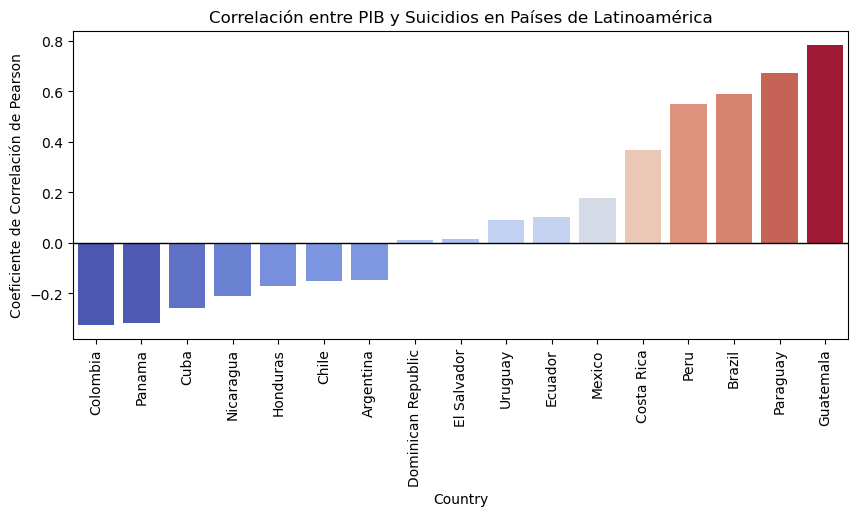

In [23]:
correlaciones = df_latam.groupby('Country')[['Gross Domestic Product', 'Suicides number']].corr().unstack().iloc[:, 1]

# Filtrar solo los países donde hay datos suficientes y valores significativos
correlaciones = correlaciones.dropna()

correlaciones = correlaciones.sort_values()

plt.figure(figsize=(10, 4))
sns.barplot(x=correlaciones.index, y=correlaciones.values, hue=correlaciones.values, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=1)
plt.title("Correlación entre PIB y Suicidios en Países de Latinoamérica")
plt.ylabel("Coeficiente de Correlación de Pearson")
plt.show()

**Interpretación del Coeficiente de Correlación de Pearson**

- Valores positivos (rojo): Indican que a medida que el PIB aumenta, también tiende a aumentar el número de suicidios en ese país.

- Valores negativos (azul): Indican que a medida que el PIB aumenta, el número de suicidios tiende a disminuir en ese país.

- Valores cercanos a 0: No hay una relación clara entre PIB y suicidios.

**Países con correlación positiva significativa:**

Guatemala, Paraguay, Brasil y Perú muestran una fuerte correlación positiva. Esto sugiere que en estos países, el crecimiento económico está asociado con un aumento en la cantidad de suicidios.
Costa Rica y México también presentan una correlación positiva, aunque en menor medida.

**Países con correlación negativa significativa:**

Colombia, Panamá y Cuba tienen una correlación negativa notable. Esto indica que en estos países, a mayor PIB, menor cantidad de suicidios.
Nicaragua, Honduras y Chile también tienen una correlación negativa, aunque menos pronunciada.

**Países con correlación cercana a 0:**

Uruguay, El Salvador y Ecuador muestran valores cercanos a 0, lo que sugiere que en estos países el PIB no tiene un impacto claro sobre la tasa de suicidios.

**4.5 Relación con Mortalidad Adulta e Infantil**

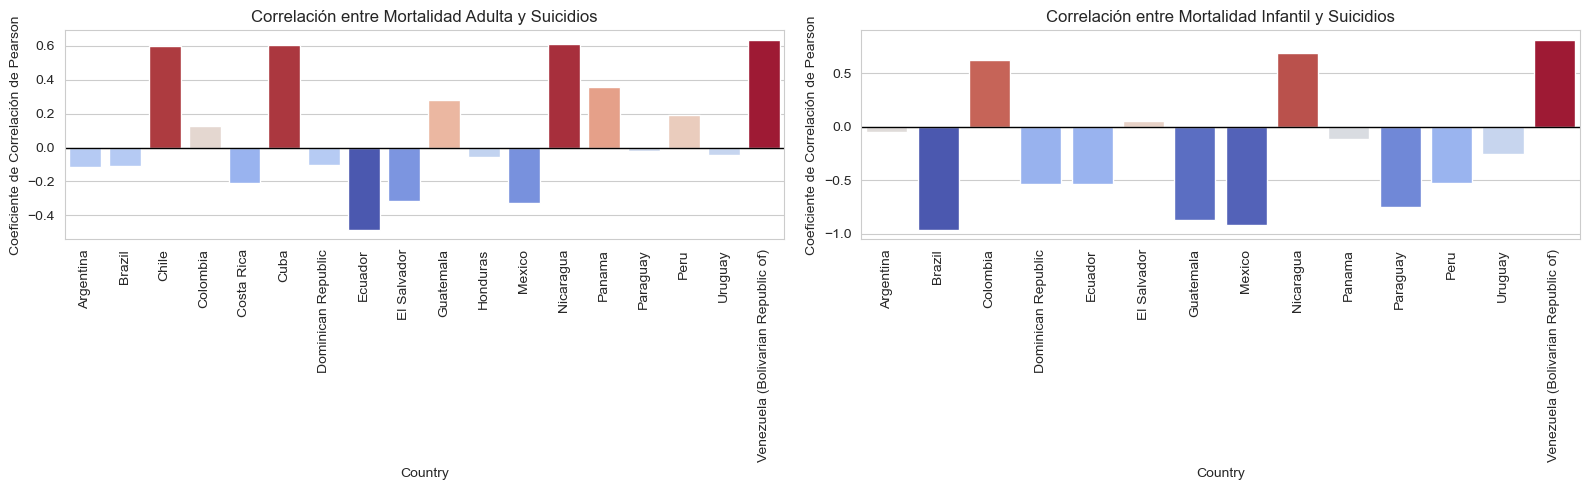

In [49]:
# Calcular la correlación entre 'Adult Mortality' y 'Suicides number'
corr_adult = df_latam.groupby('Country')[['Adult Mortality', 'Suicides number']].corr().unstack().iloc[:, 1].dropna()

# Calcular la correlación entre 'Infant deaths' y 'Suicides number'
corr_infant = df_latam.groupby('Country')[['Infant deaths', 'Suicides number']].corr().unstack().iloc[:, 1].dropna()

# Crear la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de correlación entre Adult Mortality y Suicides number
sns.barplot(x=corr_adult.index, y=corr_adult.values, hue=corr_adult.values, palette="coolwarm", ax=axes[0], legend=False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_title("Correlación entre Mortalidad Adulta y Suicidios")
axes[0].set_ylabel("Coeficiente de Correlación de Pearson")

# Gráfico de correlación entre Infant deaths y Suicides number
sns.barplot(x=corr_infant.index, y=corr_infant.values, hue=corr_infant.values, palette="coolwarm", ax=axes[1], legend=False)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_title("Correlación entre Mortalidad Infantil y Suicidios")
axes[1].set_ylabel("Coeficiente de Correlación de Pearson")

plt.tight_layout()
plt.show()

**A partir de los gráficos de correlación entre Mortalidad Adulta / Mortalidad Infantil y Suicidios en países de Latinoamérica, podemos extraer las siguientes conclusiones:**

1. Relación entre Mortalidad Adulta y Suicidios


**Correlaciones Positivas Significativas:** Países como Chile, Cuba, Nicaragua y Venezuela muestran una correlación positiva fuerte entre la mortalidad adulta y los suicidios, lo que sugiere que en estos países, a mayor tasa de mortalidad adulta, mayor número de suicidios.

**Correlaciones Negativas:** Países como El Salvador, Ecuador y Mexico presentan correlaciones negativas, lo que indica que en estos casos, una mayor mortalidad adulta podría estar asociada con menos suicidios.

**Variabilidad entre Países:** Se observa una alta heterogeneidad en la relación, lo que implica que otros factores socioeconómicos pueden estar influyendo en la relación entre estas variables.

2. Relación entre Mortalidad Infantil y Suicidios

**Correlaciones Positivas Altas:** Países como Colombia, Nicaragua, y Venezuela presentan una fuerte correlación positiva entre mortalidad infantil y suicidios, lo que podría indicar que en estos países, factores estructurales que afectan la mortalidad infantil también impactan en las tasas de suicidio.

**Correlaciones Negativas:** En países como Paraguay, Brasil, Guatemala, Mexico, se observa una correlación negativa, lo que sugiere que en estos lugares, una mayor mortalidad infantil podría no estar relacionada con un aumento en los suicidios, sino que otros factores podrían estar en juego.

**Mayor variabilidad que en Mortalidad Adulta:** Se observan correlaciones negativas más marcadas en algunos países en comparación con la mortalidad adulta, lo que sugiere que la relación entre mortalidad infantil y suicidios es aún más dependiente de condiciones socioeconómicas, políticas y de salud pública.


3. Implicaciones Generales
   
En países donde ambas correlaciones son positivas y fuertes (como Venezuela y Nicaragua), podría haber factores estructurales que afectan tanto la salud pública como la salud mental de la población.
En países con correlaciones mixtas, es posible que la relación entre mortalidad y suicidios esté mediada por factores culturales, económicos o de acceso a la salud mental.
Los países con correlaciones negativas podrían estar experimentando dinámicas distintas, como una mejor atención en salud mental pese a altas tasas de mortalidad o sistemas de protección social que amortiguan los efectos adversos.

**4.6 Comparación de Suicidios según Escolaridad**

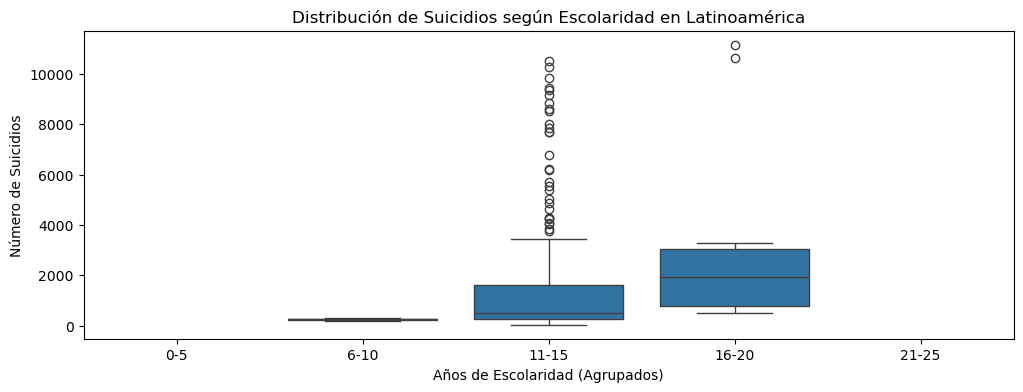

In [24]:
# Crear categorías de escolaridad en df_latam
df_latam['Schooling_bins'] = pd.cut(df_latam['Schooling'], bins=[0, 5, 10, 15, 20, 25],
                                    labels=['0-5', '6-10', '11-15', '16-20', '21-25'])

# Gráfico Boxplot de suicidios según escolaridad
plt.figure(figsize=(12,4))
sns.boxplot(x='Schooling_bins', y='Suicides number', data=df_latam)

plt.title('Distribución de Suicidios según Escolaridad en Latinoamérica')
plt.xlabel('Años de Escolaridad (Agrupados)')
plt.ylabel('Número de Suicidios')

plt.show()

**Observaciones del gráfico:**

- Los suicidios aumentan en personas con más años de escolaridad.

- El grupo de 11-15 años de educación tiene más casos extremos (outliers), lo que indica que en algunos países el número de suicidios en este grupo es anormalmente alto.

- El grupo de 16-20 años muestra la mediana más alta, lo que sugiere que hay una tendencia creciente de suicidios en personas con educación superior.

- Los niveles de escolaridad más bajos (0-10 años) casi no presentan casos de suicidios.

**4.7  Asociación con Consumo de Alcohol**

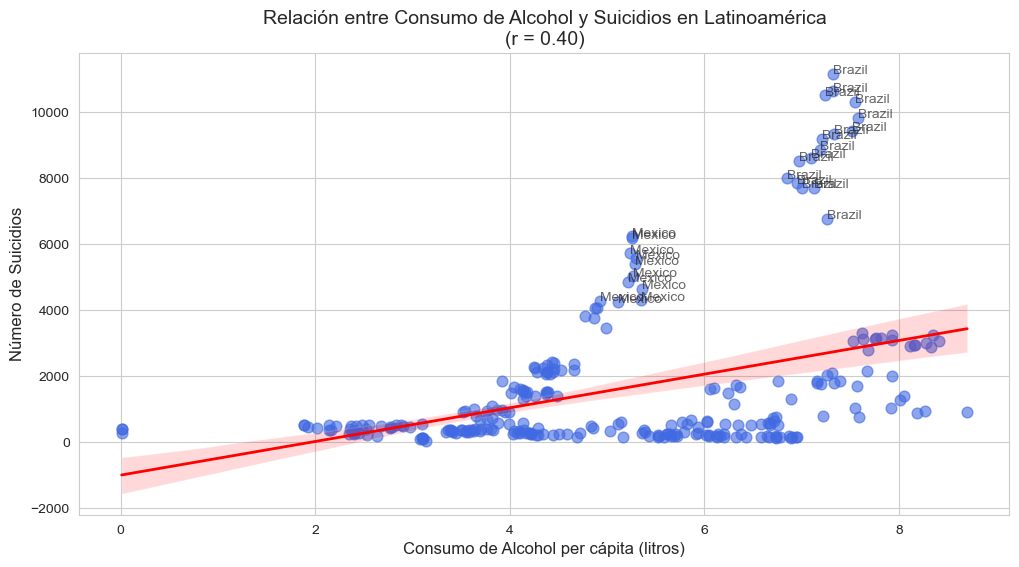

In [25]:
# Calcular la correlación entre consumo de alcohol y suicidios
r, _ = pearsonr(df_latam['Alcohol'], df_latam['Suicides number'])

# Configurar estilo de la gráfica
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear el scatter plot con regresión
sns.regplot(x='Alcohol', y='Suicides number', data=df_latam,
            scatter_kws={'alpha': 0.6, 's': 60, 'color': 'royalblue'},
            line_kws={'color': 'red', 'linewidth': 2})  # Línea de tendencia

# Agregar etiquetas a algunos países clave
for i, row in df_latam.iterrows():
    if row['Suicides number'] > df_latam['Suicides number'].quantile(0.9):  # Etiquetar los valores más altos
        plt.annotate(row['Country'], (row['Alcohol'], row['Suicides number']), fontsize=10, alpha=0.7)

# Agregar títulos y etiquetas
plt.title(f'Relación entre Consumo de Alcohol y Suicidios en Latinoamérica\n(r = {r:.2f})', fontsize=14)
plt.xlabel('Consumo de Alcohol per cápita (litros)', fontsize=12)
plt.ylabel('Número de Suicidios', fontsize=12)

# Mostrar la gráfica
plt.show()

- Correlación moderada (r = 0.40) → Indica que existe una relación positiva entre el consumo de alcohol y el número de suicidios en Latinoamérica, pero no es muy fuerte.

- Países con alto consumo de alcohol y más suicidios → Brasil y México destacan con valores altos.

- Tendencia → A medida que el consumo de alcohol aumenta, el número de suicidios tiende a crecer.

- Valores atípicos → Existen algunos puntos fuera del patrón que pueden deberse a factores adicionales (ej. políticas de salud mental, cultura, economía).

**4.8 Mapa de calor de las diferentes correlaciones**

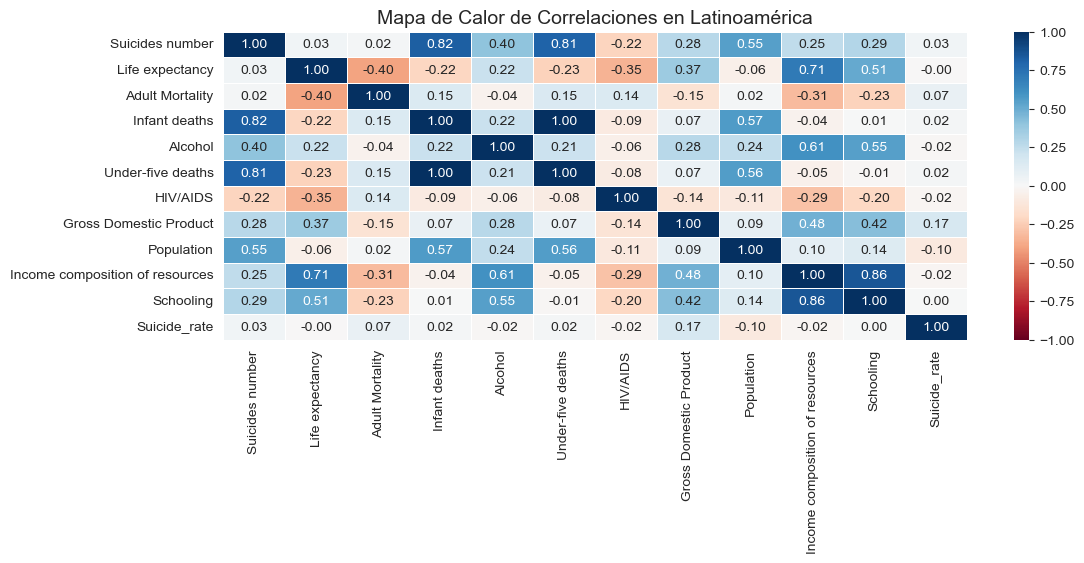

In [26]:
# Seleccionar solo las columnas numéricas y excluir 'Year'
df_numeric = df_latam.select_dtypes(include=[np.number]).drop(columns=['Year'], errors='ignore')

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Configurar la visualización
plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, fmt=".2f", linewidths=0.5,
            vmin=-1, vmax=1, annot_kws={"size": 10})


plt.title('Mapa de Calor de Correlaciones en Latinoamérica', fontsize=14)

plt.show()


**Puntos Clave en los Resultados:**

**1. Relación entre consumo de alcohol y suicidios:**

Alcohol vs. Suicides number → 0.40 (correlación positiva moderada)
- Esto sugiere que un mayor consumo de alcohol podría estar relacionado con un mayor número de suicidios en la región.

**2. Factores asociados con la esperanza de vida**

Life Expectancy vs. Income composition of resources → 0.71
- A mayor acceso a recursos y mejor calidad de vida, mayor esperanza de vida.

Life Expectancy vs. Adult Mortality (-0.40) y Infant Deaths (-0.22)
- Como es lógico, una mayor mortalidad infantil y adulta se asocia con una menor esperanza de vida.

**3. Variables relacionadas con el número de suicidios**

Under-five deaths vs. Suicides number (0.81)
- Una correlación alta indica que en países con mayor mortalidad infantil también hay más suicidios. Puede estar asociado a factores estructurales como desigualdad y acceso limitado a salud.

Population vs. Suicides number (0.55)
- Esto es esperable, ya que países con más población suelen tener más suicidios en términos absolutos.

**4. Factores socioeconómicos**

GDP (Producto Interno Bruto) vs. Income Composition (0.48)
- Países con mayores ingresos también tienen mejores indicadores de acceso a recursos.

GDP vs. Alcohol (0.28)
- En economías con mayor PIB per cápita, el consumo de alcohol es más alto, posiblemente por mayor poder adquisitivo.



# **5. Comparaciones**

**5.1 Indicadores de Colombia vs. Estados Unidos y Japon**

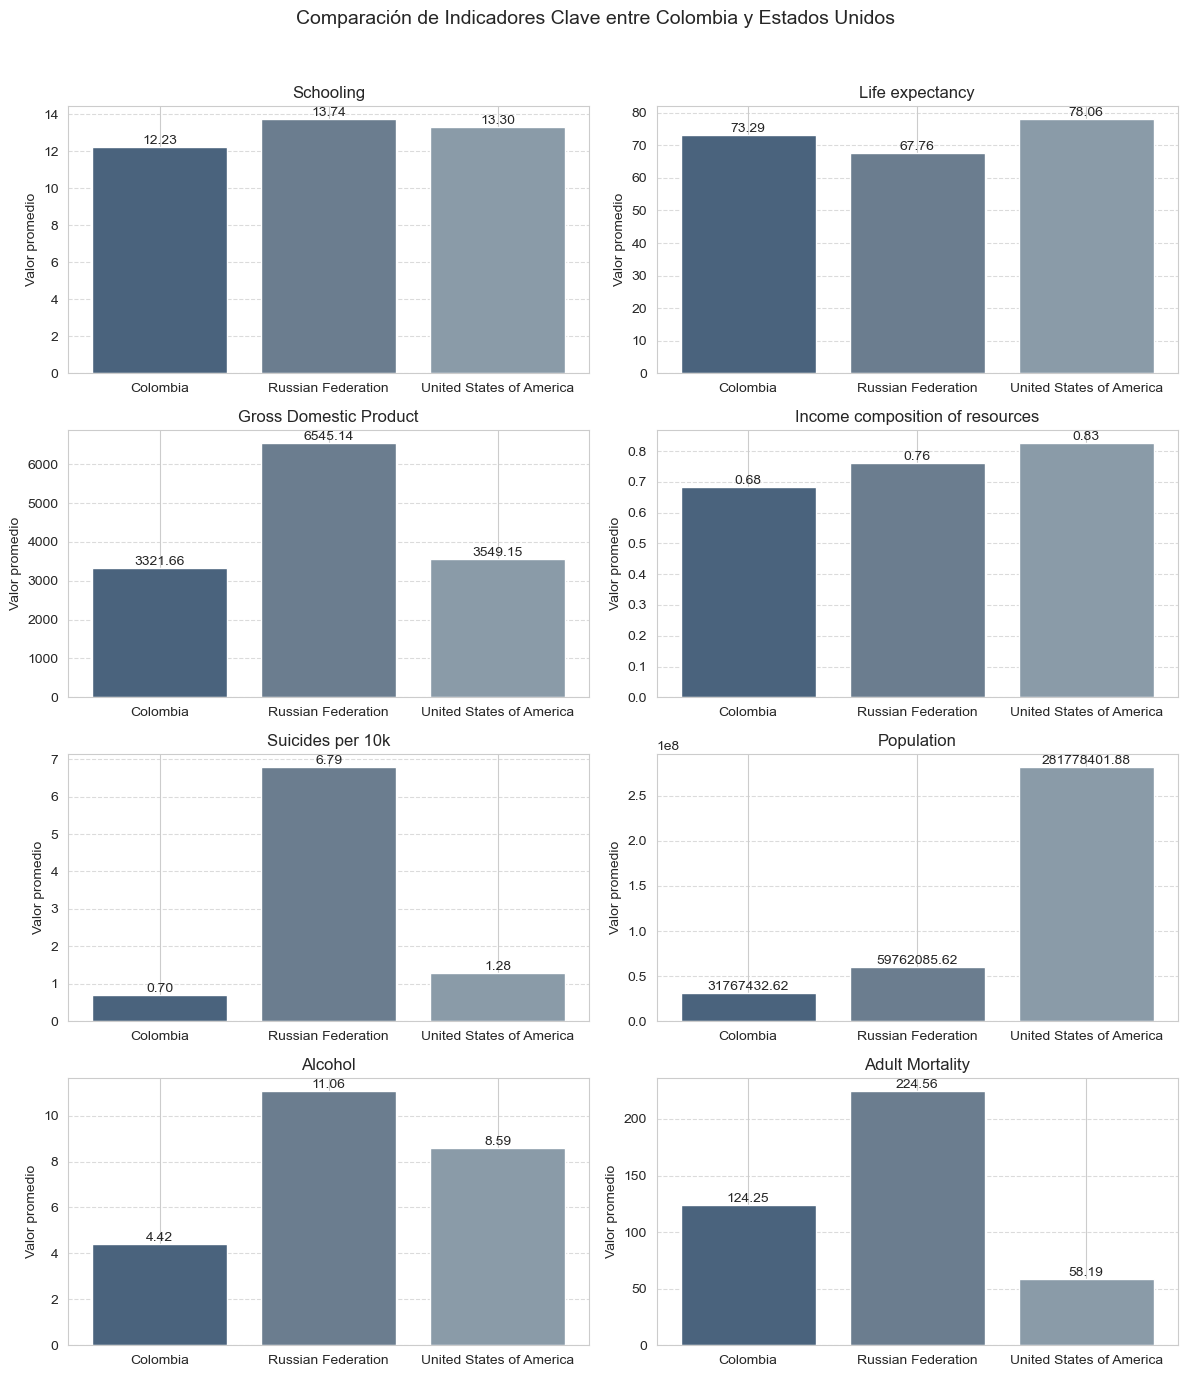

In [27]:
# Calcular promedios de indicadores clave para Colombia y Estados Unidos
indicadores_clave = [
    "Schooling", "Life expectancy", "Gross Domestic Product", "Income composition of resources",
    "Suicides number", "Population", "Alcohol", "Adult Mortality"
]

df_comparacion = df[df["Country"].isin(["Colombia", "United States of America", "Russian Federation"])]

promedios_comparacion = df_comparacion.groupby("Country")[indicadores_clave].mean()
promedios_comparacion

# Calcular la tasa de suicidios por cada 10,000 personas
promedios_comparacion["Suicides per 10k"] = (promedios_comparacion["Suicides number"] / promedios_comparacion["Population"]) * 10000


# Crear gráficos de barras para cada indicador clave
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
axes = axes.flatten()

for i, indicador in enumerate(indicadores_clave):
    if indicador == "Suicides number":
        indicador = "Suicides per 10k"

    prom_comparacion = promedios_comparacion[indicador]
    bars = axes[i].bar(prom_comparacion.index, prom_comparacion.values, color=["#4A637D", "#6B7D8F", "#8A9BA8"])

    # Agregar los valores encima de cada barra
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)



    axes[i].set_title(indicador, fontsize=12)
    axes[i].set_ylabel("Valor promedio")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle("Comparación de Indicadores Clave entre Colombia y Estados Unidos", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Se compararon Estados Unidos y Rusia debido a sus diferencias en desarrollo económico y social en contraste con Colombia, lo que permite identificar posibles áreas de mejora para el país.

Se filtraron los datos de estos tres países utilizando indicadores clave, a partir de los cuales se pueden obtener los siguientes análisis:

**Esperanza de vida y escolaridad**

* Se observa que Rusia tiene un mayor nivel de escolaridad en comparación con Colombia y EE.UU., pero su esperanza de vida es la más baja entre los tres países. Esto indica que la educación, por sí sola, no es suficiente para garantizar un mayor bienestar.

**Consumo de Alcohol y Suicidios**

* Existe una posible correlación entre el consumo excesivo de alcohol y la tasa de suicidios, especialmente en Rusia.

**PIB y Calidad de Vida**
* A pesar de que Rusia tiene un PIB mayor que Colombia, presenta peores indicadores de salud y bienestar, como baja esperanza de vida, alta mortalidad adulta y una elevada tasa de suicidios.
* Un PIB más alto no garantiza una mejor calidad de vida si no hay una adecuada distribución de recursos, acceso a salud y educación de calidad.

**Tasa de Suicidios**

* Ajustando el número de suicidios por cada 10,000 habitantes, se observa que Rusia tiene una mayor carga relativa de suicidios, lo que podría estar relacionado con el nivel de estrés social.

**Mortalidad Adulta y Consumo de Alcohol**

* En Rusia, el alto consumo de alcohol se asocia con mayores índices de mortalidad adulta, lo que sugiere que esta sustancia contribuye significativamente a problemas de salud.
* En Colombia, aunque el índice de consumo de alcohol es más bajo, la mortalidad adulta sigue siendo intermedia. Esto indica que el alcohol no es el único factor determinante; también influyen aspectos como los accidentes y las enfermedades.


**5.2  Promedios de indicadores en Latinoamerica**

In [45]:
# Indicadores clave para analizar acceso a educación y sus efectos
indicadores_educacion = [
    "Schooling", "Income composition of resources", "Life expectancy",
    "Adult Mortality", "Gross Domestic Product", "Suicides number", "Population", "Alcohol"
]

# Calcular promedios por país
promedios_latam = df_latam.groupby("Country")[indicadores_educacion].mean()

# Calcular la tasa de suicidios por cada 10,000 personas
promedios_latam["Suicides per 10k"] = (promedios_latam["Suicides number"] / promedios_latam["Population"]) * 10000

# Eliminar la columna de número absoluto de suicidios para enfocarnos en tasas
promedios_latam = promedios_latam.drop(columns=["Suicides number", "Population"])

# Mostrar los promedios de educación y su relación con otros factores en Latinoamérica
promedios_latam

,Schooling,Income composition of resources,Life expectancy,Adult Mortality,Gross Domestic Product,Alcohol,Suicides per 10k
Country,,,,,,,
Argentina,16.506250,0.794125,75.156250,106.000000,6998.575103,7.964375,1.519759
Brazil,14.162500,0.710187,73.381250,150.687500,6143.161794,7.220000,1.024000
Chile,14.900000,0.801312,79.450000,63.625000,6202.344364,6.989375,1.230467
Colombia,12.231250,0.681875,73.287500,124.250000,3321.660748,4.416875,0.696212
Costa Rica,12.746667,0.734400,78.526667,67.666667,4144.618257,3.924667,1.176876
Cuba,14.693750,0.742125,77.975000,57.562500,3180.434884,4.201875,1.413649
Dominican Republic,12.678571,0.680714,72.142857,142.142857,3101.058801,6.038571,0.403718
Ecuador,13.012500,0.698875,74.725000,132.125000,2005.352468,3.808125,0.946405
El Salvador,12.620000,0.648600,71.626667,153.533333,2410.549089,2.692667,1.732595


**5.3  Relacion de escolaridad de Colombia con pais con mayor y menor educacion**

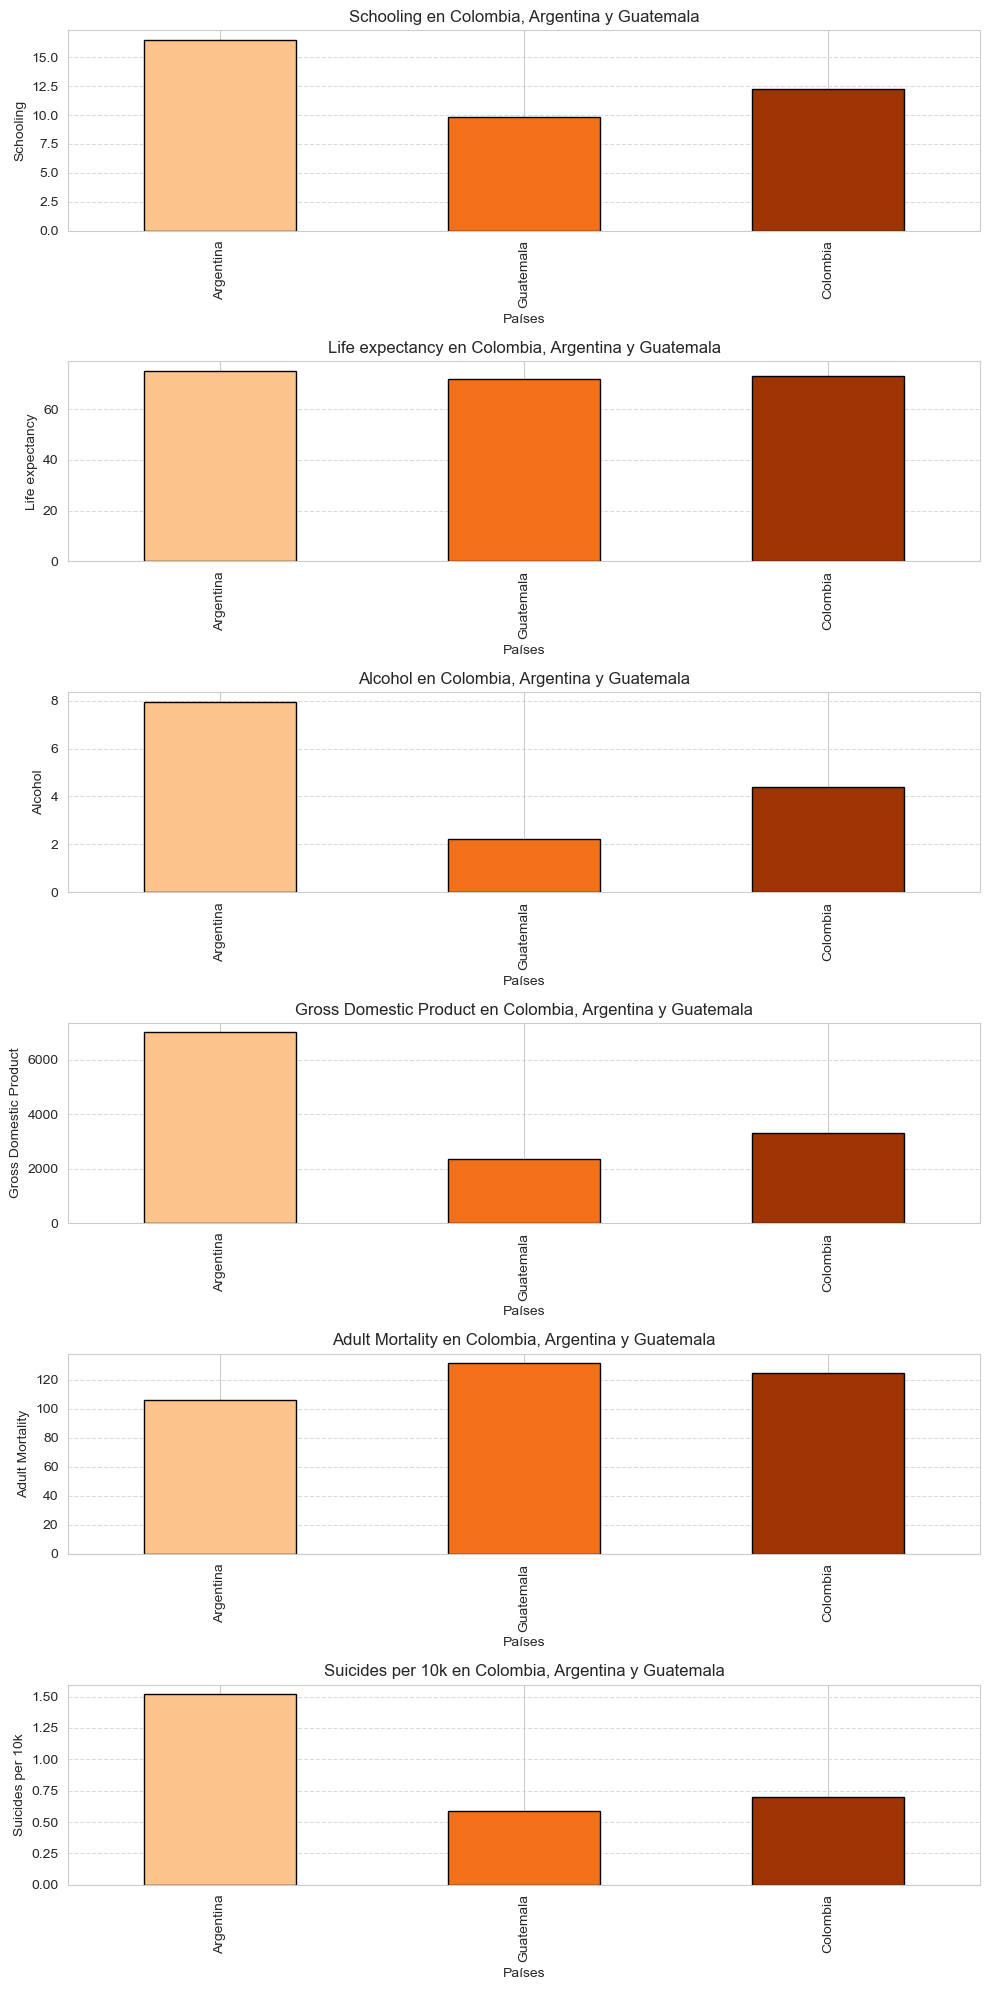

In [46]:
# Encontrar país con mayor y menor escolaridad
pais_mayor_educacion = promedios_latam["Schooling"].idxmax()  # País con mayor educación
pais_menor_educacion = promedios_latam["Schooling"].idxmin()  # País con menor educación

# Seleccionar solo los países para la comparación
paises_comparacion = [pais_mayor_educacion, pais_menor_educacion, "Colombia"]
df_comparacion = promedios_latam.loc[paises_comparacion]

# Lista de indicadores a comparar con escolaridad
indicadores_comparacion = ["Schooling", "Life expectancy", "Alcohol", "Gross Domestic Product", "Adult Mortality", "Suicides per 10k"]

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=len(indicadores_comparacion), ncols=1, figsize=(10, 20))


# Generar gráficos individuales para cada indicador
for i, indicador in enumerate(indicadores_comparacion):
    df_comparacion[indicador].plot(kind="bar", ax=axes[i], color=plt.cm.Oranges([0.3, 0.6, 0.9]), edgecolor="black")
    axes[i].set_title(f"{indicador} en Colombia, {pais_mayor_educacion} y {pais_menor_educacion}")
    axes[i].set_ylabel(indicador)
    axes[i].set_xlabel("Países")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

plt.show()

En esta comparación se busca analizar la relación entre el nivel educativo de algunos países en Latinoamérica y otros indicadores, para determinar qué tan importante llega a ser la educación en los índices de suicidio.

Algunas conclusiones pueden ser:

**Mayor escolaridad -> Mayor expectativa de vida**

* El país con mayor escolaridad también tiene la mayor expectativa de vida, lo que sugiere que una mejor educación puede estar relacionada con un mayor bienestar general.
* Colombia tiene una expectativa de vida intermedia, lo que indicaría que aún hay margen de mejora en educación.

**Relación entre escolaridad y PIB**

* Argentina, que presenta un mayor nivel de escolaridad, tiene un PIB más alto. Esto sugiere que más años de educación pueden estar asociados con una economía más fuerte y mejores oportunidades laborales.
* Colombia se encuentra más cerca del país con menor escolaridad en términos de PIB, lo que podría ser una señal de que se necesita mayor inversión en educación para mejorar el desarrollo económico.

**Alcohol y mortalidad adulta**

* Se observa que la mortalidad no está directamente relacionada con el consumo de alcohol en el país con mayor educación. Sin embargo, el país con menor educación y menor consumo de alcohol presenta un índice de mortalidad más alto. A partir de esto, se pueden plantear dos hipótesis:
  1. Factor socioeconómico: En el país con menor consumo de alcohol y menor nivel
educativo, la mayor mortalidad podría deberse a otros factores, como la violencia o la pobreza.
  2. Factor educativo: Una mejor educación puede estar relacionada con un mejor sistema de salud, lo que permite a la población acceder a información y mejores tratamientos médicos, compensando así los efectos negativos en la salud.
* Colombia se encuentra en un punto intermedio. Sería necesario analizar si su nivel de consumo de alcohol está afectando la salud pública.

**Escolaridad y suicidios**

* Si la tasa de suicidios es más alta en el país con mayor escolaridad, esto podría indicar que factores como el estrés laboral, las presiones académicas o la desigualdad también desempeñan un papel importante.


# 7. prediccion del numero de suicidios anual en colombia con un modelo ARIMA

El código convierte 'Year' a entero, ordena el DataFrame y luego lo establece como índice, convirtiéndolo a datetime con el formato '%Y' para facilitar el análisis temporal.

In [29]:
# Librerías para series de tiempo y análisis estadístico
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Cargar el dataset
df = pd.read_csv("https://raw.githubusercontent.com/Andres54ml/fundamentos_programacion/refs/heads/main/expo.csv", thousands=".")

# Convertir 'Year' a entero y ordenar
df['Year'] = df['Year'].astype(int)
df.sort_values('Year', inplace=True)

# Establecer 'Year' como índice y convertirlo a objeto datetime
df.set_index('Year', inplace=True)
df.index = pd.to_datetime(df.index.astype(str), format='%Y')

# Mostrar el DataFrame resultante
print(df.head(60))

            Suicidios
Year                 
1960-01-01        415
1961-01-01        584
1962-01-01        710
1963-01-01        759
1964-01-01        833
1965-01-01       1108
1966-01-01       1090
1967-01-01       1244
1968-01-01        805
1969-01-01        584
1972-01-01        779
1974-01-01        920
1975-01-01        842
1976-01-01        850
1977-01-01        733
1984-01-01       1070
1985-01-01       1010
1986-01-01        976
1987-01-01        963
1988-01-01        926
1989-01-01        842
1990-01-01        880
1991-01-01       1020
1992-01-01       1101
1993-01-01       1105
1994-01-01       1224
1995-01-01       1172
1996-01-01       1229
1997-01-01       1260
1998-01-01       2112
1999-01-01       2163
2000-01-01       2378
2001-01-01       2426
2002-01-01       2396
2003-01-01       2283
2004-01-01       2264
2005-01-01       2119
2006-01-01       2188
2007-01-01       2191
2008-01-01       2234
2009-01-01       2259
2010-01-01       2118
2011-01-01       2052
2012-01-01

**7.1 visualizacion de la serie de tiempo original**

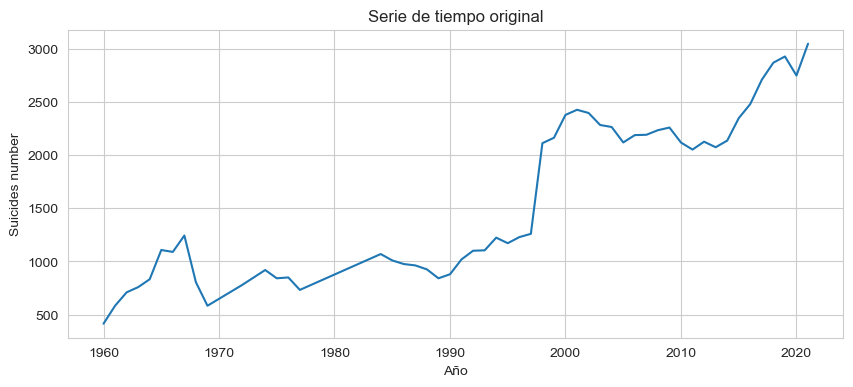

In [30]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title("Serie de tiempo original")
plt.xlabel("Año")
plt.ylabel("Suicides number")
plt.grid(True)
plt.show()

**7.2 ACF y PACF de la serie original**

La ACF (función de autocorrelación) muestra cómo se correlaciona la serie con sus propios rezagos; un decaimiento exponencial sugiere un proceso autoregresivo. La PACF (autocorrelación parcial) elimina el efecto de los rezagos intermedios y, en tu caso, un pico fuerte en el primer rezago


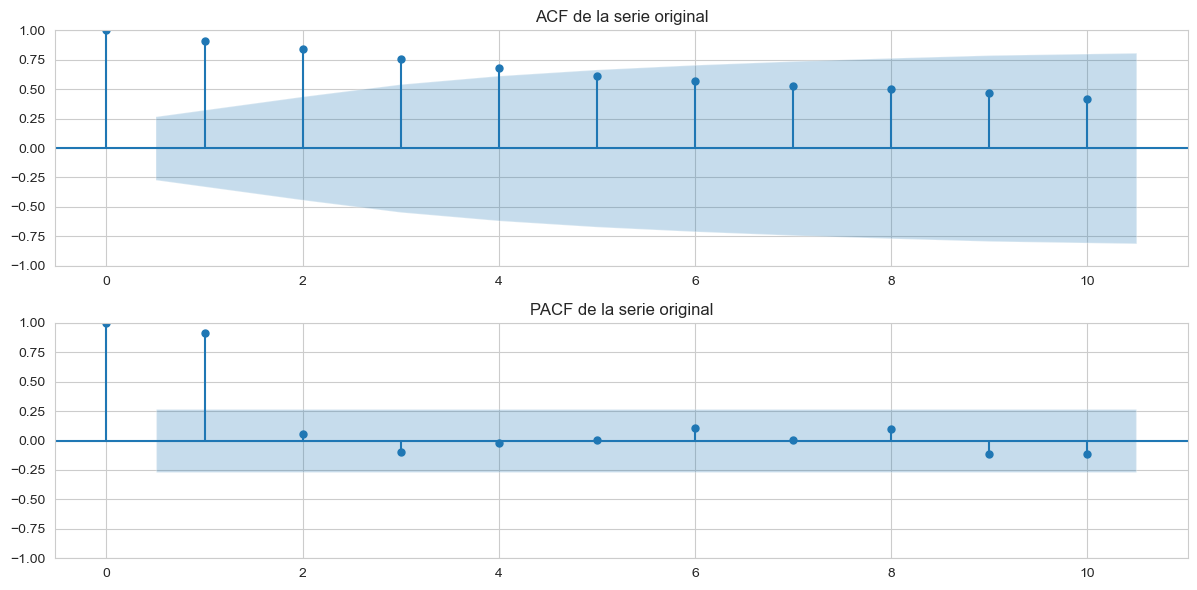

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plot_acf(df, lags=10, ax=plt.gca())
plt.title("ACF de la serie original")
plt.subplot(2,1,2)
plot_pacf(df, lags=10, ax=plt.gca(), method='ywm')
plt.title("PACF de la serie original")
plt.tight_layout()
plt.show()

**7.3 prueba de ADF para verificar la estacionariedad de la serie original**

La prueba ADF (Dickey-Fuller Aumentada) se usa para determinar si una serie de tiempo es estacionaria. En esta prueba, la hipótesis nula (H0) es que la serie tiene una raíz unitaria (es decir, no es estacionaria), mientras que la hipótesis alternativa (H1) indica que la serie es estacionaria. En tu serie original, la prueba ADF mostró que no era estacionaria.

**Hipótesis de la Prueba de Dickey-Fuller Aumentada (ADF)**

La prueba ADF se utiliza para evaluar la estacionariedad de una serie temporal y se basa en dos hipótesis:

- **Hipótesis nula (H₀):** La serie tiene una raíz unitaria, lo que implica que es **no estacionaria** (puede presentar tendencia o variaciones en la varianza a lo largo del tiempo).

- **Hipótesis alternativa (H₁):** La serie **es estacionaria**, es decir, no posee raíz unitaria y sus propiedades estadísticas (media, varianza) se mantienen constantes en el tiempo.

In [33]:
adf_result = adfuller(df)
print("Prueba ADF sobre la serie original:")
print(f"ADF Statistic: {adf_result[0]:.3f}")
print(f"p-value: {adf_result[1]:.3f}")

if adf_result[1] > 0.05:
    print("La serie NO es estacionaria. Se recomienda diferenciarla.")
else:
    print("La serie es estacionaria.")

Prueba ADF sobre la serie original:
ADF Statistic: -0.430
p-value: 0.905
La serie NO es estacionaria. Se recomienda diferenciarla.


**7.4 diferenciacion de primer order la serie orginal y prueba de ADF**

La diferenciación consiste en calcular la diferencia entre valores consecutivos de la serie. Esto ayuda a eliminar tendencias o estacionalidades, estabilizando la media y la varianza a lo largo del tiempo. Al aplicar la diferenciación a tu serie y volver a realizar la prueba ADF, se obtuvo una serie estacionaria, lo que confirma que la transformación fue efectiva.

**Diferenciación de Primer Orden en Series de Tiempo**

La diferenciación de primer orden se utiliza para eliminar tendencias y estabilizar la media de una serie temporal. La ecuación es:

$$
\Delta y_t = y_t - y_{t-1}
$$

donde:
- \\( y_t \\) es el valor en el tiempo \\( t \\),
- \\( y_{t-1} \\) es el valor en el período anterior,
- \\( \Delta y_t \\) es la serie diferenciada de primer orden.

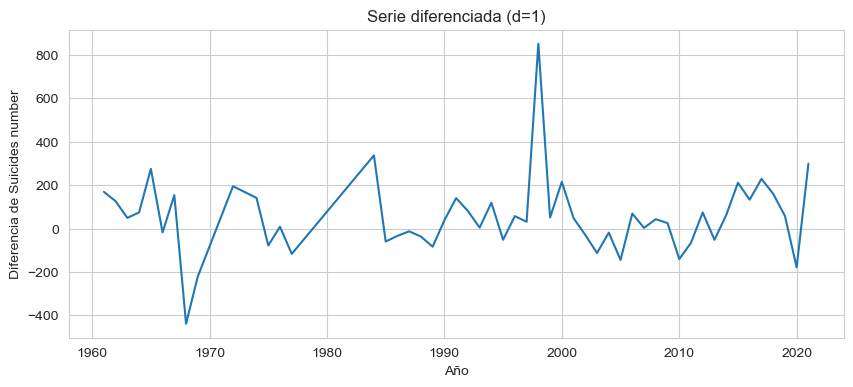

Prueba ADF sobre la serie diferenciada:
ADF Statistic: -6.796
p-value: 0.000
La serie diferenciada es estacionaria.


In [35]:
# aplicamos una diferenciación (d=1)
ts_diff = df.diff(periods=1).dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff)
plt.title("Serie diferenciada (d=1)")
plt.xlabel("Año")
plt.ylabel("Diferencia de Suicides number")
plt.grid(True)
plt.show()

# Verificamos la estacionariedad de la serie diferenciada
adf_result_diff = adfuller(ts_diff)
print("Prueba ADF sobre la serie diferenciada:")
print(f"ADF Statistic: {adf_result_diff[0]:.3f}")
print(f"p-value: {adf_result_diff[1]:.3f}")
if adf_result_diff[1] > 0.05:
    print("La serie diferenciada NO es estacionaria.")
else:
    print("La serie diferenciada es estacionaria.")

**7.5 ACF y PACF de la serie diferenciada**

En la serie original, la ACF decae de forma exponencial y la PACF muestra un pico fuerte en el primer rezago, lo que es típico de una caminata aleatoria (indicando la presencia de una raíz unitaria). Al diferenciar la serie, se elimina la tendencia y se obtiene una serie estacionaria cuya ACF y PACF se comportan como ruido blanco (sin picos significativos). Esto confirma que la serie original era una caminata aleatoria.

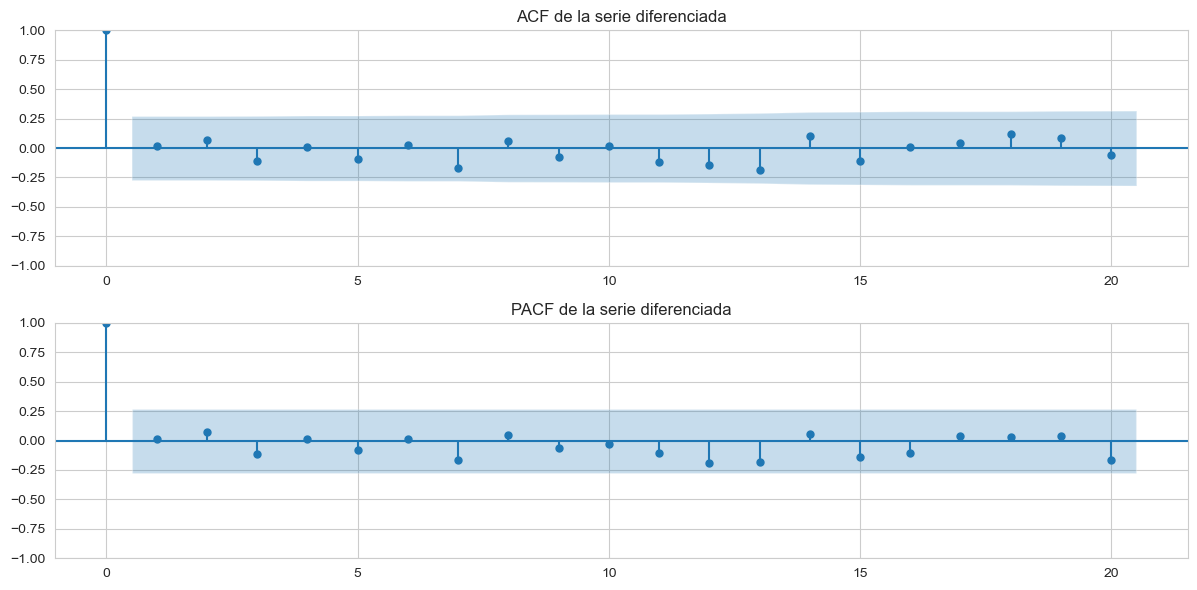

In [36]:
# Graficamos ACF y PACF de la serie diferenciada
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plot_acf(ts_diff, lags=20, ax=plt.gca())
plt.title("ACF de la serie diferenciada")
plt.subplot(2,1,2)
plot_pacf(ts_diff, lags=20, ax=plt.gca(), method='ywm')
plt.title("PACF de la serie diferenciada")
plt.tight_layout()
plt.show()

**7.6 division de train y test**

In [37]:
# Dividir los datos: 85% para entrenamiento y 15% para prueba
train_size = int(len(df) * 0.90)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("Datos de entrenamiento:", train.shape)
print("Datos de prueba:", test.shape)

Datos de entrenamiento: (47, 1)
Datos de prueba: (6, 1)


**7.7 estimacion de la caminata aleatoria con tendencia (drift)**

Para series que se comportan como una caminata aleatoria, el modelo ideal es el ARIMA(0,1,0). Esto se debe a que, al diferenciar la serie una vez (d=1), se obtiene ruido blanco, lo que indica que no se requieren componentes autoregresivos (p=0) ni de media móvil (q=0). Ademas, la serie original muestra cierta tendencia por lo que vamos a un incluir un parametro drift para que capture ese comportamiento.

**Caminata Aleatoria con Drift**

La ecuación de una caminata aleatoria con drift es:

$$
y_t = \mu + y_{t-1} + \varepsilon_t
$$

donde:
- \\( y_t \\) es el valor en el tiempo \\( t \\),
- \\( \mu \\) es el término de drift (cambio constante o tendencia),
- \\( y_{t-1} \\) es el valor en el período anterior,
- \\( \varepsilon_t \\) es el error aleatorio (ruido blanco) con media cero y varianza constante.


In [39]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(train, order=(0, 1, 0), trend='t')
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Suicidios   No. Observations:                   47
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -303.766
Date:                Fri, 21 Feb 2025   AIC                            611.531
Time:                        18:10:15   BIC                            615.188
Sample:                             0   HQIC                           612.901
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            42.0000     30.853      1.361      0.173     -18.470     102.470
sigma2      3.182e+04   3504.387      9.079      0.000    2.49e+04    3.87e+04
Ljung-Box (L1) (Q):                   0.02   Jarque-

**7.8 revision de los errores del modelo**

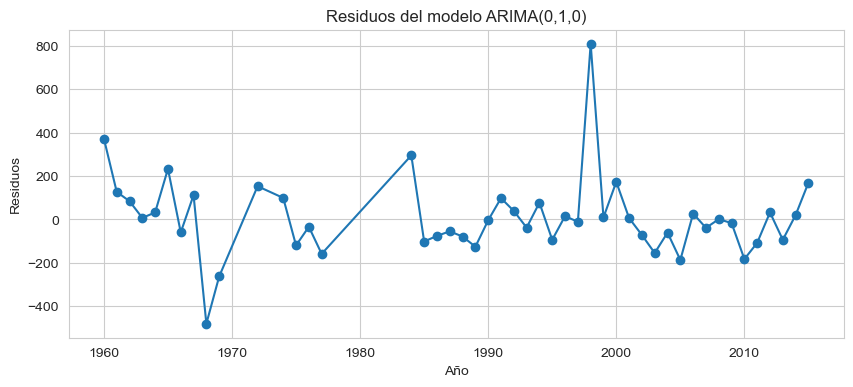

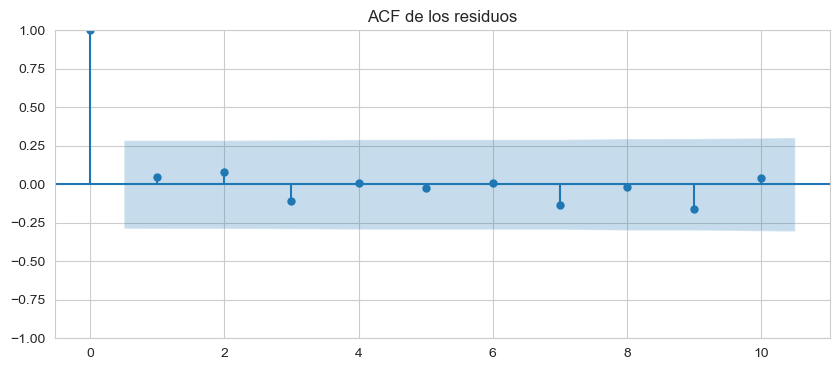

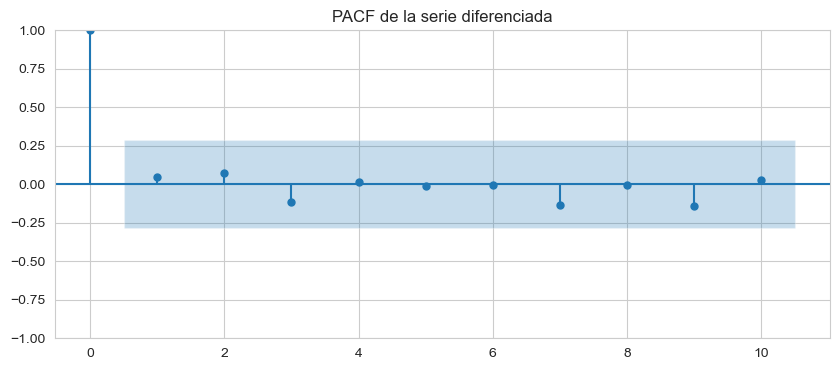

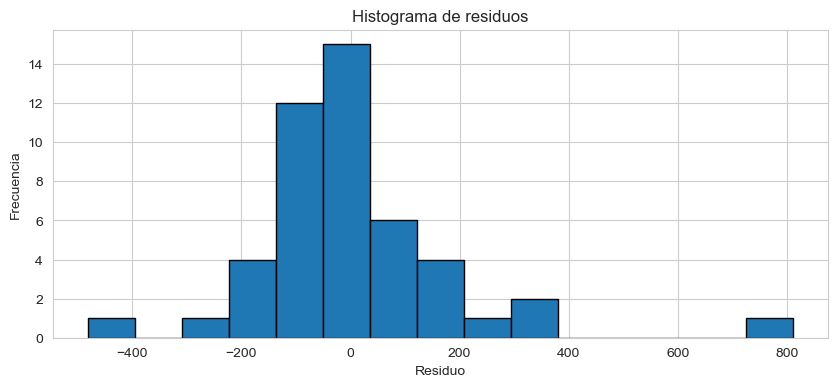

In [40]:
# Extraer residuos del modelo
residuals = model_fit.resid

# Graficar los residuos
plt.figure(figsize=(10,4))
plt.plot(residuals, marker='o')
plt.title("Residuos del modelo ARIMA(0,1,0)")
plt.xlabel("Año")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

# Graficar ACF de los residuos
plt.figure(figsize=(10,4))
plot_acf(residuals, lags=10, ax=plt.gca())
plt.title("ACF de los residuos")
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(residuals, lags=10, ax=plt.gca())
plt.title("PACF de la serie diferenciada")
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10,4))
plt.hist(residuals, bins=15, edgecolor='k')
plt.title("Histograma de residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

**7.9 pronostico**

             pronostico
Fecha                  
2016-01-01  2388.999976
2017-01-01  2430.999952
2018-01-01  2472.999927
2019-01-01  2514.999903
2020-01-01  2556.999879
2021-01-01  2598.999855


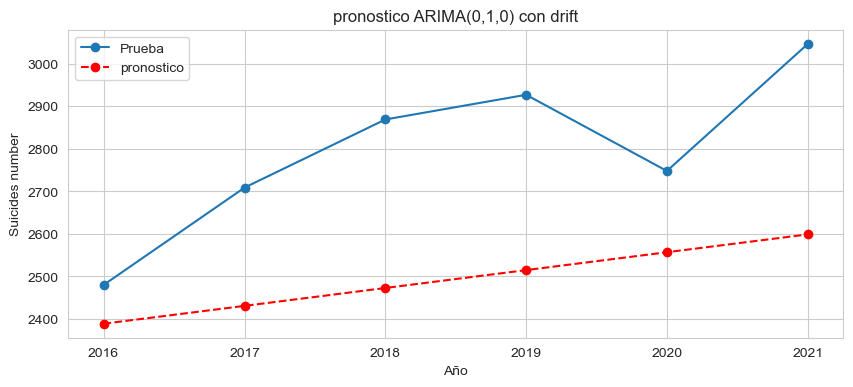

In [41]:
# Pronosticar para el número de períodos que tiene el conjunto de prueba
forecast_steps = len(test)

forecast = model_fit.forecast(steps=forecast_steps)

# Crear DataFrame con las mismas fechas que el test
forecast_df = pd.DataFrame({'Fecha': test.index, 'pronostico': forecast})
forecast_df.set_index('Fecha', inplace=True)

print(forecast_df.head(6))

# Graficar resultados
plt.figure(figsize=(10,4))
# plt.plot(train, label="Entrenamiento", marker='o')
plt.plot(test, label="Prueba", marker='o')
plt.plot(forecast_df.index, forecast_df.pronostico, label="pronostico", marker='o', linestyle='--', color='red')
plt.title("pronostico ARIMA(0,1,0) con drift")
plt.xlabel("Año")
plt.ylabel("Suicides number")
plt.legend()
plt.grid(True)
plt.show()

**MAPE (Error Porcentual Absoluto Medio)**

El MAPE mide el error relativo de las predicciones en términos porcentuales. Se define mediante la siguiente ecuación:

$$
MAPE = \frac{100}{n} \sum_{t=1}^{n} \left|\frac{y_t - \hat{y}_t}{y_t}\right|
$$

In [42]:
# Calcular el MAPE
mape = np.mean(np.abs((test['Suicidios'] - forecast_df['pronostico']) / test['Suicidios'])) * 100
print(f"El MAPE es: {mape:.2f}%")


El MAPE es: 10.58%


# 8. Conclusiones

En general, el análisis de este dataset revela cómo diversos factores socioeconómicos y de salud influyen en la cantidad de suicidios a lo largo del tiempo y en distintos países. Se observa que variables como la esperanza de vida, la mortalidad adulta e infantil, el consumo de alcohol y el acceso a la educación pueden estar correlacionadas con la incidencia de suicidios. Además, el PIB y la composición de ingresos parecen desempeñar un papel importante, sugiriendo que condiciones económicas más favorables podrían estar asociadas con menores tasas de suicidio. Identificar estas relaciones es clave para diseñar políticas de prevención más efectivas, enfocadas en mejorar el bienestar social y la salud mental a nivel global.

Ahora bien, el análisis de la tendencia en el número de suicidios en Colombia revela que aumenta año tras año y presenta una tendencia al alza. Este hallazgo es preocupante y subraya la necesidad de:

- **Intervenciones en Salud Pública:** Fortalecer programas de prevención y atención en salud mental, especialmente en los grupos más vulnerables.
- **Educación:** Un sistema educativo sólido puede fomentar habilidades socioemocionales que ayuden a los jóvenes a gestionar el estrés, la ansiedad y la presión social.
La educación es clave para reducir la desigualdad y el desempleo, factores que pueden contribuir a la desesperanza y al suicidio.
- **Políticas Públicas:** Implementar estrategias que aborden los factores sociales y económicos asociados al suicidio.
- **Investigación y Sensibilización:** Profundizar en el estudio de los factores subyacentes y concienciar a la sociedad sobre la importancia de la salud mental, eliminando el estigma en torno a la búsqueda de ayuda profesional.

Es fundamental romper con la idea de que "los psicólogos son solo para los locos" y entender que buscar ayuda no es motivo de vergüenza, sino una acción valiente y necesaria para el bienestar individual y colectivo.

# 9. Oportunidades de mejora

1. Poca data para realizar un pronóstico robusto y para establecer las diferentes relaciones.
2. Identificaion de los outliers en la serie de tiempo para corregirlos y tener un mejor pronostico y un comportamiento mejor en los residuales del model
3. Ampliar el uso de métodos y modelos para tratar páneles de datos.
4. Hacer mayor uso de segmentaciones por grupos de países para un mejor análisis de las correlaciones.